## Last test at Colab : 2022-04-26

## 한글



*   이론 :  https://wikidocs.net/164365 and https://wikidocs.net/164823  and https://wikidocs.net/164835 
*   구현 : https://wikidocs.net/165034  and https://wikidocs.net/164499 


## English


*   Theory : https://wikidocs.net/165403 and https://wikidocs.net/165405  and https://wikidocs.net/165406 
*   Implementation : https://wikidocs.net/165443  and https://wikidocs.net/165444 



### Below part is same with FFN.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import Model, Sequential

import matplotlib.pyplot as plt
import numpy as np

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 256 
num_classes = 10
EPOCHS = 5
batch_size = 100
learning_rate = 0.001

# print(tf.__version__)

The data load part of Cifar 10 is the same as eager mode.

In [2]:
cifar10 = tf.keras.datasets.cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


### Below part is same with FFN.

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

print(Y_train[0:10])

print(X_train.shape)

# in the case of Keras or TF2, type shall be [image_size, image_size, 1]
# if it is RGB type, type shall be [image_size, image_size, 3]
# For MNIST or Fashion MNIST, it need to reshape

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
(50000, 32, 32, 3)


In the case of Cifar10, the data is RGB type and is in the form of [image_size, image_size, 3], so the two lines below are not necessary. The two lines below do not need to be used.

In [4]:
# X_train = X_train[..., tf.newaxis]
# X_test = X_test[..., tf.newaxis]

### Below part is same with FFN.

In [6]:
print(X_train.shape)
    
# 입력된 buffer_size만큼 data를 채우고 무작위로 sampling하여 새로운 data로 바꿉니다.
# 완벽한 셔플링을 위해서는 데이터 세트의 전체 크기보다 크거나 같은 버퍼 크기가 필요합니다.
# 만약 작은 데이터수보다 작은 buffer_size를 사용할경우,
# 처음에 설정된 buffer_size만큼의 data안에서 임의의 셔플링이 발생합니다.
shuffle_size = 100000

(50000, 32, 32, 3)


Therefore, the dataset can be defined as follows. When compared with MNIST, only the name "X_train, X_test" was changed from "X_train_new_axis, X_test_new_axis".

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train, Y_train)).shuffle(shuffle_size).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(batch_size)

### Below part is same with FFN.

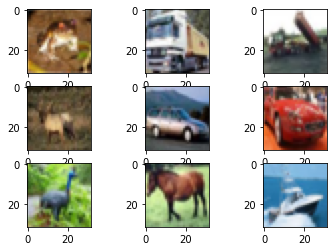

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Train Epoch 1:   0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Test_ Epoch 1:   0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch 2:   0%|          | 0/500 [00:00<?, ?it/s]

Test_ Epoch 2:   0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch 3:   0%|          | 0/500 [00:00<?, ?it/s]

Test_ Epoch 3:   0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch 4:   0%|          | 0/500 [00:00<?, ?it/s]

Test_ Epoch 4:   0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch 5:   0%|          | 0/500 [00:00<?, ?it/s]

Test_ Epoch 5:   0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # if you want to invert color, you can use 'gray_r'. this can be used only for MNIST, Fashion MNIST not cifar10
    # pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray_r'))
    
# show the figure
plt.show()

# 3-Layers Convolution neural network with one hidden layer
class CNN_Model(Model):
    def __init__(self):
        super(CNN_Model, self).__init__()
        
        # Convolution 1
        self.conv1 = Conv2D(64, 3, activation='relu', padding='SAME')
        
        # Max pool 1
        self.maxpool2d1 = MaxPool2D(padding='SAME')
     
        # Convolution 2
        self.conv2 = Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME')
        
        # Max pool 2
        self.maxpool2d2 = MaxPool2D(padding='SAME')
        
        # Convolution 3
        self.conv3 = Conv2D(filters=256, kernel_size=3, activation=tf.nn.relu, padding='SAME')
        
        # Max pool 3
        self.maxpool2d3 = MaxPool2D(padding='SAME')
        self.flatten = Flatten()
        self.d1 = Dense(256, activation='relu')
        self.d2 = Dropout(0.2)
        self.d3 = Dense(10, activation='softmax')

    def call(self, x):
        # Convolution 1
        x = self.conv1(x)
        
        # Max pool 1
        x = self.maxpool2d1(x)
        
        # Convolution 2 
        x = self.conv2(x)
        
        # Max pool 2 
        x = self.maxpool2d2(x)
        
        # Convolution 3
        x = self.conv3(x)
        # Max pool 3
        x = self.maxpool2d3(x)
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        out = self.d3(x)
        return out

model = CNN_Model()

# model.summary()

criterion = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = criterion(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)
    

@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = criterion(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

from tqdm import tqdm, tqdm_notebook, trange

for epoch in range(EPOCHS):
    
    with tqdm_notebook(total=len(train_ds), desc=f"Train Epoch {epoch+1}") as pbar:    
        train_losses = []
        train_accuracies = []
        
        for images, labels in train_ds:
            
            train_step(images, labels)
            
            loss_val= train_loss.result()
            acc     = train_accuracy.result()*100
            
            train_losses.append(loss_val)
            train_accuracies.append(acc)
            
            pbar.update(1)
            pbar.set_postfix_str(f"Loss: {loss_val:.4f} ({np.mean(train_losses):.4f}) Acc: {acc:.3f} ({np.mean(train_accuracies):.3f})")

    with tqdm_notebook(total=len(test_ds), desc=f"Test_ Epoch {epoch+1}") as pbar:    
        test_losses = []
        test_accuracies = []
        for test_images, test_labels in test_ds:
            test_step(test_images, test_labels)

            loss_val= test_loss.result()
            acc     = test_accuracy.result()*100
            
            test_losses.append(loss_val)
            test_accuracies.append(acc)

            pbar.update(1)
            pbar.set_postfix_str(f"Loss: {loss_val:.4f} ({np.mean(test_losses):.4f}) Acc: {acc:.3f} ({np.mean(test_accuracies):.3f})")
            
